# Predicting the Probability of Default of potential Borrower


## Credit Risk Modeling

---




## Table of Contents

#### The Problem

>*   [Why loan defaulters is a problem?](https://https://colab.research.google.com/drive/1jKuIoX6YsxW6Bez9ahVNyP8wMa-xDaBo#scrollTo=ZX2IqfWVlFhp&line=2&uniqifier=1)



#### Examine the data



>* [Simple Inspection of Data](https://)






**The Problem:**

People apply for loan in a bank. Bank employees processes each loan application manually and evaluate applicants application based on different factors like profession of applicant, age, debt on him/her, salary, Marital status etc.

After analyzing all factors, bank decides whether to approve or reject his/her loan application. This is a tedious and time consuming process. There is certain possibility of human error too. 

For ex. Applicant A whose appliaction needs to be rejected based on his financial condition, default history and other factors but his application got approved. On the other hand, application of Applicants B needs to be approved as he/she has no debts and earning good salary etc., but his application got rejected. 

The reason could be that by mistake application's of both applicants got swapped or the person who is incharge of approving loan applications, is biased.

In both cases, Bank has to bear some loss.

Lets assume that both applicant need 1000 dollars loan from Bank. 

Applicant A :- Bank gave 1000 dollars loan to him and he got defaulted, then the total loss to bank is:- 1000 dollars.
Applicant B :- Bank did not approve his/her loan application. If his/her had got approved, then Bank had earned 100 dollars  from this.

The bank will be in more debt, if they approves a defaulters loan rather then rejecting a non-defaulters loan.
In other words giving a loan to a bad customer marked as a good customer results in a greater cost to the bank than denying a loan to a good customer marked as a bad customer.

In this project, we are developing a automated process, which will approve/reject all Loan applications, based on different factors. It will save a lot of time of the bank which was spent on manual process and help them to reduce the human errors and save Banks money by reducing the loan to defaulters.







## **Import Packages**

In [1]:
# import your libraries
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, fbeta_score
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
__author__ = "Samit Singh"
__email__ = "samitsingh.85@gmail.com"

### ---- 2 Load the data ----


---

In [2]:
#load the data into a Pandas dataframe
def load_csv(csv_file):
    return pd.read_csv(csv_file)

In [3]:

loan_df = load_csv('/content/feature_data.csv')
loan_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Examine the data

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Get list of numerical and categorical columns
num_cols = loan_df.select_dtypes(include=np.number).columns.tolist()
print('Numerical columns in data:- {}'.format(num_cols))
cat_cols = loan_df.select_dtypes(include='O').columns.tolist()
print('\nCategorical columns in data:- {}'.format(cat_cols))

Numerical columns in data:- ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

Categorical columns in data:- ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [6]:
#we need to verify the duplicate data
print('Number of duplicate rows in dataframe:- {}'.format(loan_df.duplicated().\
                                                          sum()))

Number of duplicate rows in dataframe:- 165


In [7]:
#verify if there is null values in dataframe
loan_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
loan_df.loan_int_rate.mean()

11.01169489224439

There are 895 nulls in 'pesron_emp_length' and 3116 null values in loan_int_rate. We can impute Employment length using median but cannot impute interest rate , as it might be an important factor in determining the defaulter, so we need to delete rows having null in this field.

In [9]:
# Numerical columns statistics
loan_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


As shown above , the maximum **age** of a person is **144 years**, which is an outlier.
In 'person_emp_length' column, the maximum value is **123 years**, which is also an outlier.


In [10]:
# Categorical columns statistics
loan_df.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [ ]:
# Calculate percentage of loan defaults
loan_df.loan_status.value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

### ---- 3 Clean the data ----

In [11]:
# drop dulicate rows
print('No of rows in the dataframe before change:- {}'.format(loan_df.shape[0]))
loan_df.drop_duplicates(inplace=True)
print('No of rows in the dataframe after change:-  {}'.format(loan_df.shape[0]))

No of rows in the dataframe before change:- 32581
No of rows in the dataframe after change:-  32416


In [12]:
# delete row having age gearter than 100, employment length greater than 60 & 
# interest rate is null
indices = loan_df[(loan_df.person_age > 100) | 
                  (loan_df.person_emp_length > 60)].index
                  # (loan_df.loan_int_rate.isnull())].index
# print(indices)
loan_df.drop(indices, inplace=True)

In [ ]:
# Verify the no of Nulls remaining 
loan_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3094
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
loan_df_group = loan_df.groupby('loan_status')
loan_df_group.mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,27.802298,70597.359070,4.965729,9239.335927,10.439097,0.148803,5.846491
1,27.475169,49093.100451,4.118848,10854.073787,13.067315,0.246858,5.685102


From above table, we can observe that 'Loan_amount' and 'int_rate' is higher for persons who defaulted.

In [ ]:
loan_df_group.std()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,6.155553,53934.776583,4.063200,6013.850023,2.983201,0.087114,4.018331
1,6.218546,35966.966037,3.873704,7138.114426,3.290878,0.132446,4.089470


### ---- 4 Explore the data (EDA) ----

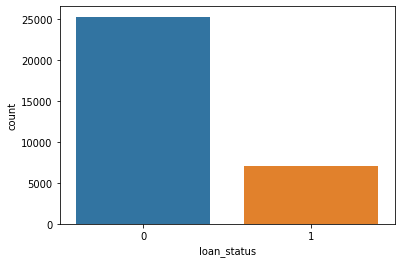

In [14]:
sns.countplot(loan_df.loan_status)

### Independent Variable (Categorical)

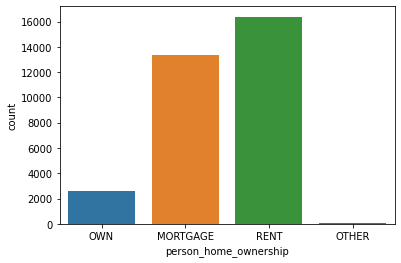

In [19]:
sns.countplot(loan_df.person_home_ownership)

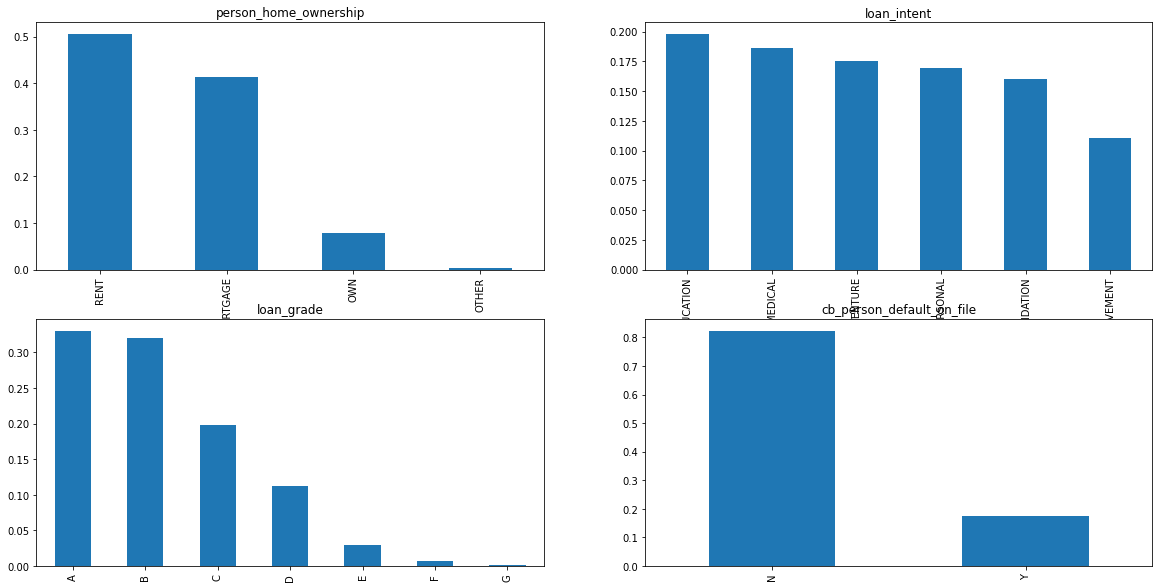

In [24]:
plt.figure(1) 
plt.subplot(221) 
loan_df['person_home_ownership'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'person_home_ownership') 
plt.subplot(222) 
loan_df['loan_intent'].value_counts(normalize=True).plot.bar(title= 'loan_intent') 
plt.subplot(223) 
loan_df['loan_grade'].value_counts(normalize=True).plot.bar(title= 'loan_grade') 
plt.subplot(224) 
loan_df['cb_person_default_on_file'].value_counts(normalize=True).plot.bar(title= 'cb_person_default_on_file') 
plt.show()

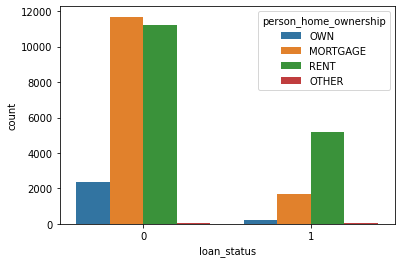

In [17]:
sns.countplot('loan_status', hue='person_home_ownership', data=loan_df)

### Independent Variable (Numerical)

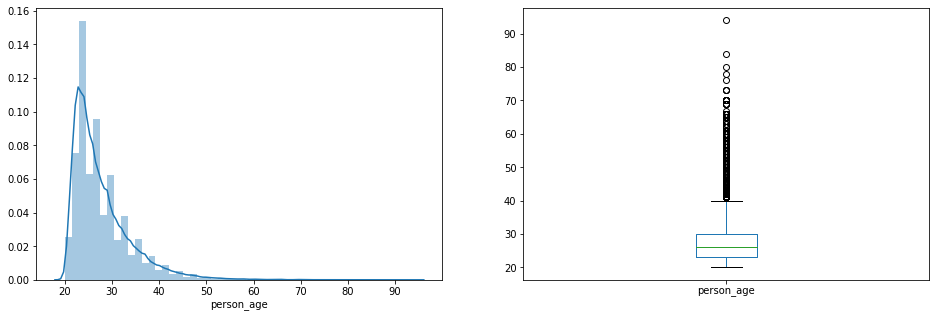

In [25]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_df['person_age']); 
plt.subplot(122) 
loan_df['person_age'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be due to people older than 60 years also applied for loan.

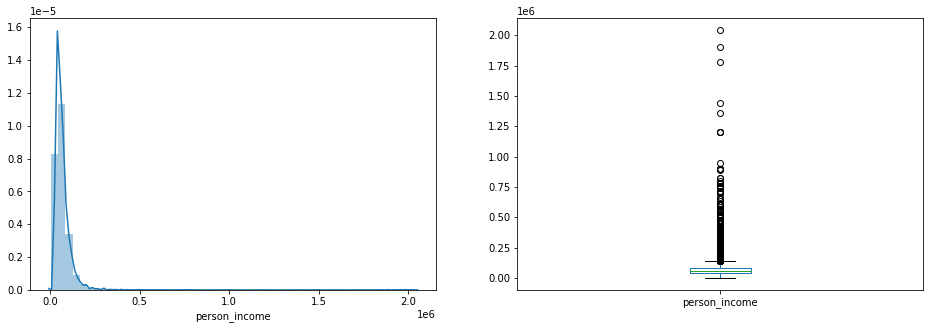

In [26]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_df['person_income']); 
plt.subplot(122) 
loan_df['person_income'].plot.box(figsize=(16,5)) 
plt.show()

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. As we do not have any Education variable in dataset, we cannot segregate
it.

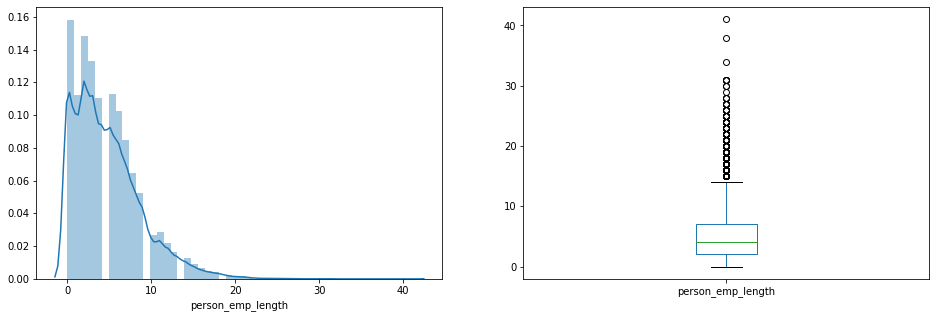

In [27]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_df['person_emp_length']); 
plt.subplot(122) 
loan_df['person_emp_length'].plot.box(figsize=(16,5)) 
plt.show()

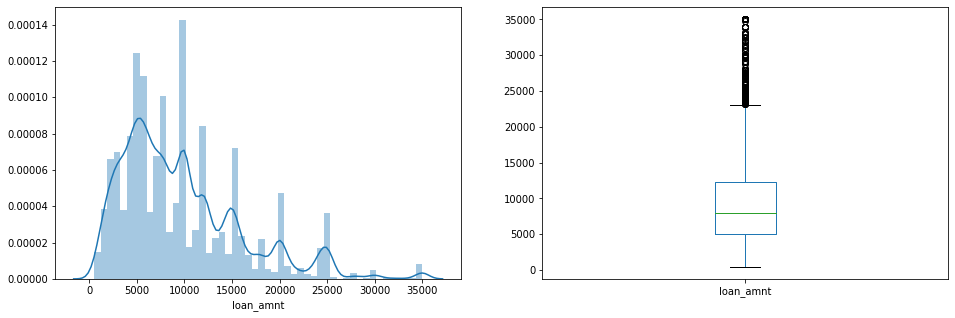

In [28]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_df['loan_amnt']); 
plt.subplot(122) 
loan_df['loan_amnt'].plot.box(figsize=(16,5)) 
plt.show()

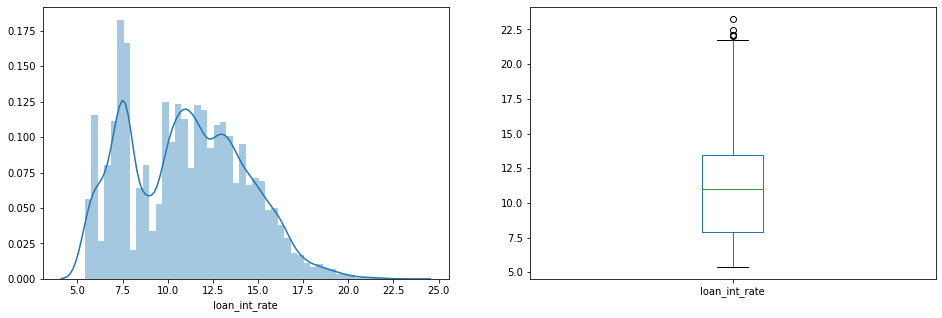

In [29]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_df['loan_int_rate']); 
plt.subplot(122) 
loan_df['loan_int_rate'].plot.box(figsize=(16,5)) 
plt.show()

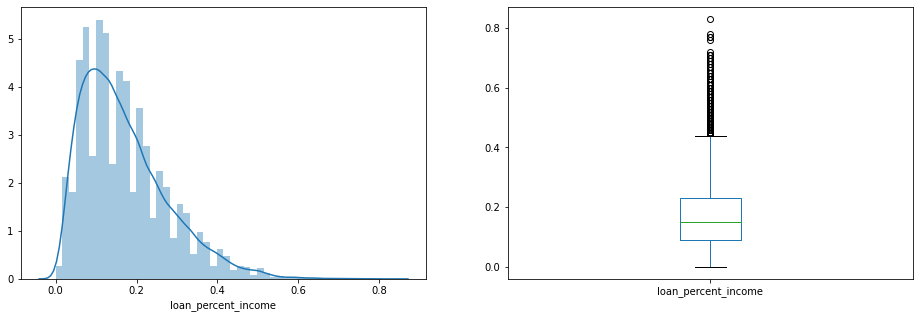

In [30]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_df['loan_percent_income']); 
plt.subplot(122) 
loan_df['loan_percent_income'].plot.box(figsize=(16,5)) 
plt.show()

## How to make it normal distribution????

In [ ]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_df['loan_percent_income']); 
plt.subplot(122) 
loan_df['loan_percent_income'].plot.box(figsize=(16,5)) 
plt.show()

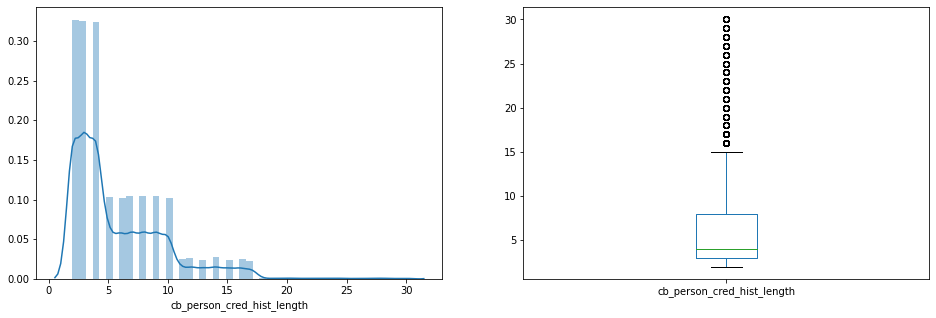

In [32]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_df['cb_person_cred_hist_length']); 
plt.subplot(122) 
loan_df['cb_person_cred_hist_length'].plot.box(figsize=(16,5)) 
plt.show()

## Bivariate Analysis

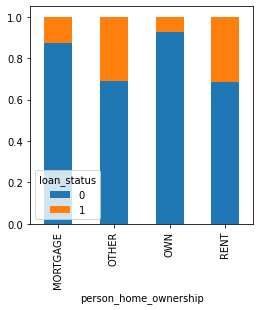

In [40]:
home_ownership=pd.crosstab(loan_df['person_home_ownership'],loan_df['loan_status']) 
home_ownership.div(home_ownership.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

#### Other & Rent ownership have more rejected loans

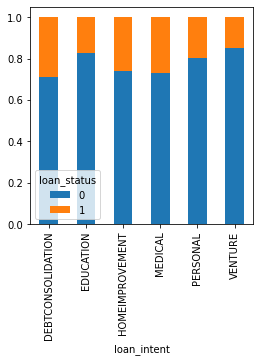

In [41]:
loan_intent=pd.crosstab(loan_df['loan_intent'],loan_df['loan_status']) 
loan_intent.div(loan_intent.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

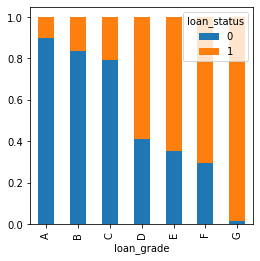

In [42]:
loan_grade=pd.crosstab(loan_df['loan_grade'],loan_df['loan_status']) 
loan_grade.div(loan_grade.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

### D,E & F category have highest rejection 

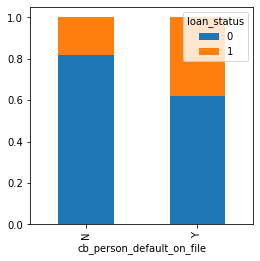

In [46]:
default_on_file=pd.crosstab(loan_df['cb_person_default_on_file'],loan_df['loan_status']) 
default_on_file.div(default_on_file.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [45]:
loan_df.loan_grade.value_counts()
loan_grade=pd.crosstab(loan_df['loan_grade'],loan_df['loan_status']) 
print(loan_grade)

loan_status     0     1
loan_grade             
A            9636  1066
B            8689  1695
C            5100  1336
D            1482  2137
E             342   621
F              71   170
G               1    63


In [38]:
home_ownership.sum(1)

person_home_ownership
MORTGAGE    13366
OTHER         106
OWN          2563
RENT        16374
dtype: int64

In [18]:
# loan_corr = loan_df.corr()

In [ ]:
loan_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.140372,0.175922,0.055755,0.011129,-0.021770,-0.040446,0.877517
person_income,0.140372,1.000000,0.160593,0.326803,-0.001019,-0.172188,-0.298871,0.121197
person_emp_length,0.175922,0.160593,1.000000,0.108559,-0.058474,-0.086718,-0.059980,0.151748
loan_amnt,0.055755,0.326803,0.108559,1.000000,0.146926,0.106920,0.572818,0.045513
loan_int_rate,0.011129,-0.001019,-0.058474,0.146926,1.000000,0.335812,0.120111,0.015855
loan_status,-0.021770,-0.172188,-0.086718,0.106920,0.335812,1.000000,0.379390,-0.015046
loan_percent_income,-0.040446,-0.298871,-0.059980,0.572818,0.120111,0.379390,1.000000,-0.030017
cb_person_cred_hist_length,0.877517,0.121197,0.151748,0.045513,0.015855,-0.015046,-0.030017,1.000000


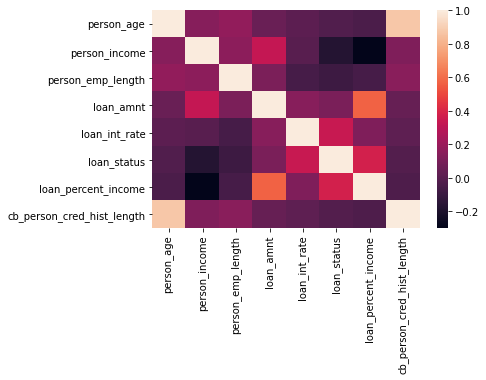

In [ ]:
sns.heatmap(loan_corr)

Text(0, 0.5, 'Loan Count')

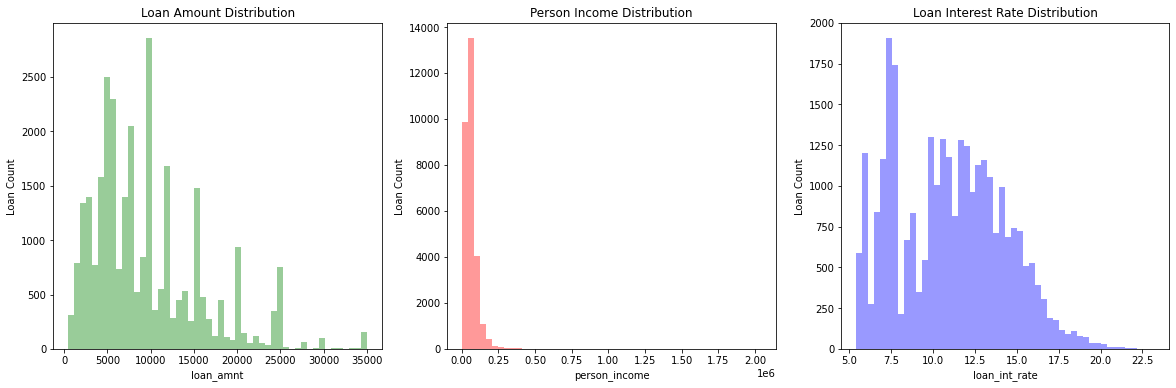

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(20, 6))

# Graph Employee Satisfaction
sns.distplot(loan_df.loan_amnt, kde=False, color="g", ax=axes[0]).set_title('Loan Amount Distribution')
axes[0].set_ylabel('Loan Count')

# Graph Employee Evaluation
sns.distplot(loan_df.person_income, kde=False, color="r", ax=axes[1]).set_title('Person Income Distribution')
axes[1].set_ylabel('Loan Count')

# Graph Employee Average Monthly Hours
sns.distplot(loan_df.loan_int_rate, kde=False, color="b", ax=axes[2]).set_title('Loan Interest Rate Distribution')
axes[2].set_ylabel('Loan Count')